In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df = pd.read_csv('../input/heart-failure-prediction/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Exploratory Data Analysis (EDA)

In [3]:
df.shape

(918, 12)

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There is no null value.

In [6]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

The given data is rather balanced

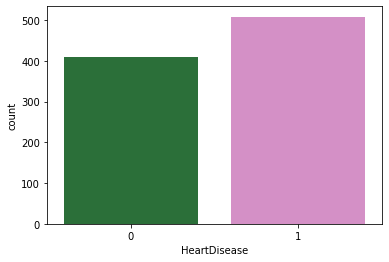

In [7]:
sns.countplot(x="HeartDisease", data=df, saturation = 1.0, palette="cubehelix")
plt.show()

In [8]:
No_HeartDisease = len(df[df.HeartDisease == 0])
print("Percentage of people who do not have heart disease: {:.2f} %".format((No_HeartDisease / (len(df.HeartDisease))*100)))
Have_HeartDisease = len(df[df.HeartDisease == 1])
print("Percentage of people who have heart disease: {:.2f} %".format((Have_HeartDisease / (len(df.HeartDisease))*100)))

Percentage of people who do not have heart disease: 44.66 %
Percentage of people who have heart disease: 55.34 %


In [9]:
df.groupby('HeartDisease').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


In [10]:
corr = df.corr()
fig = go.Figure(data= go.Heatmap(z=corr,
                                 x=corr.index.values,
                                 y=corr.columns.values,
                                 colorscale= "Viridis",
                                 text = corr.round(2), texttemplate="%{text}"
                                 ),
                layout=go.Layout(height=700, width=900),
                )

fig.update_layout(title_text='<b>The Correlation Matrix<b>',
                  title_x=0.50,
                  titlefont={'size': 29, 'family': 'Times New Roman'},
                  width=720, height=720,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed', 
                  paper_bgcolor=None,
                  )

fig.show()

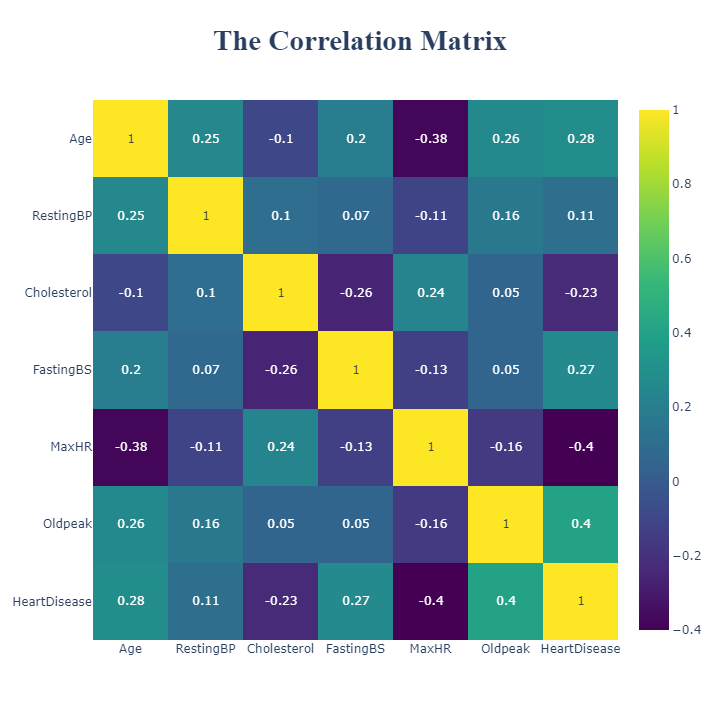

There are different types of correlation between the columns, including both positive and negative correlation. Also, there are almost no correlations between some columns

In [11]:
fig = px.histogram(df, x="Sex",color='HeartDisease', barmode='group', color_discrete_map={0:'#46039f',1:'#f0f921'})
fig.show()

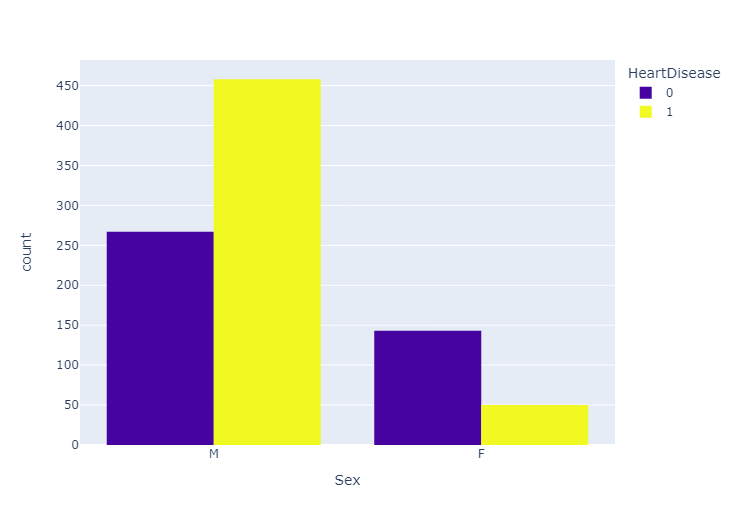

Men stand a higher chance to suffer from the heart disease.

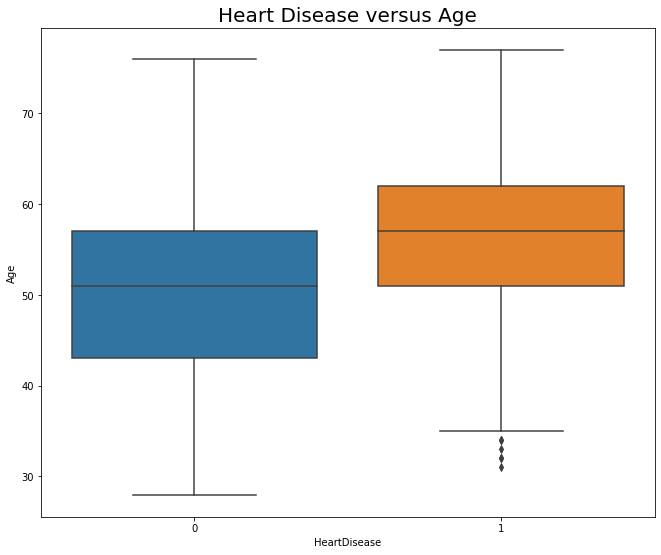

In [12]:
plt.figure(figsize= (11,9))
sns.boxplot(x= df["HeartDisease"], y= df["Age"])
plt.title("Heart Disease versus Age",size = 20)
plt.show()

The elder people are (especially from the age of 55 to 60), the higher chance they can suffer from heart disease

In [13]:
fig = px.histogram(df, x="Cholesterol", marginal="box", histnorm='probability density', color_discrete_map={0:'RebeccaPurple',1:'MediumPurple'}, template="simple_white")
fig.update_layout(title="Cholesterol Distribution")
fig.show()

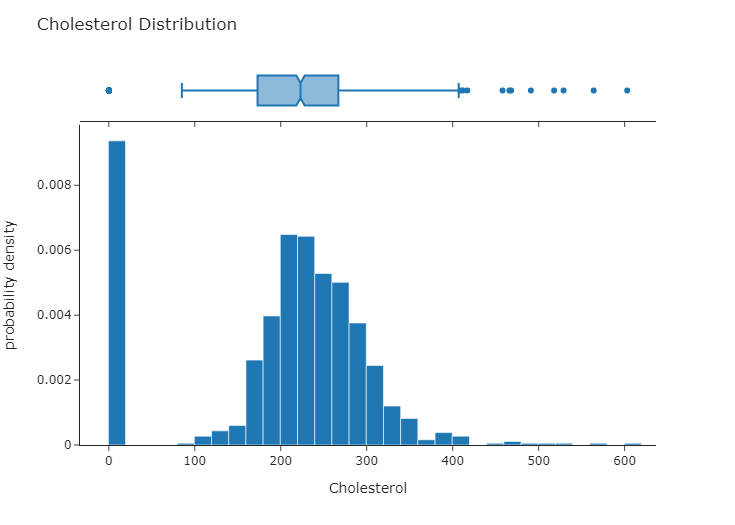

The Cholesterol rate is mostly concentrated in the 200-280 mm/dl range.

In [14]:
df[["ExerciseAngina","HeartDisease"]].groupby(["ExerciseAngina"],as_index= False).mean().sort_values(by="HeartDisease",ascending=False)

,ExerciseAngina,HeartDisease
1,Y,0.851752
0,N,0.351005


In [15]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [16]:
fig=px.pie(df,names='ChestPainType', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

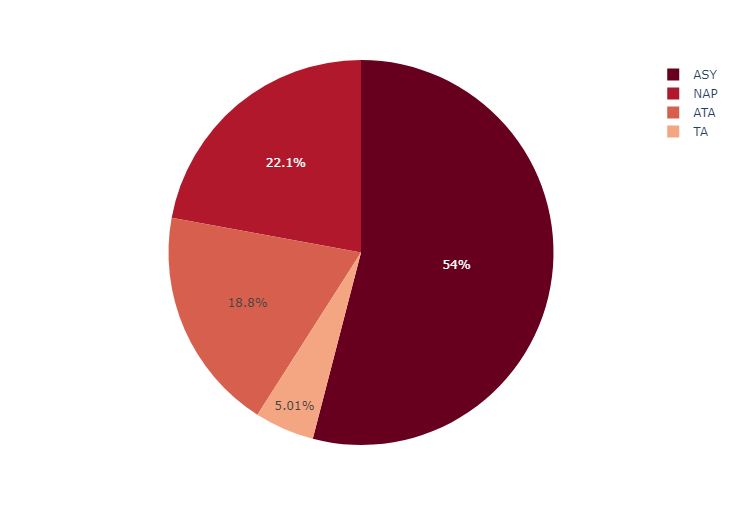

People with ChestPain Type ASY are more prone to suffer from Heart Disease.

# Logistic Regression Algorithm

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Data Preprocessing 
le = LabelEncoder()
column_list = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for column in column_list:
    df[column] = le.fit_transform(df[column])
x = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']
x = MinMaxScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)
model = LogisticRegression(class_weight=None, random_state = 0, max_iter = 100).fit(x_train, y_train)
y_pred = model.predict(x_test)
LR = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression is {:.2f} %".format(LR*100)) 

Accuracy of Logistic Regression is 88.59 %


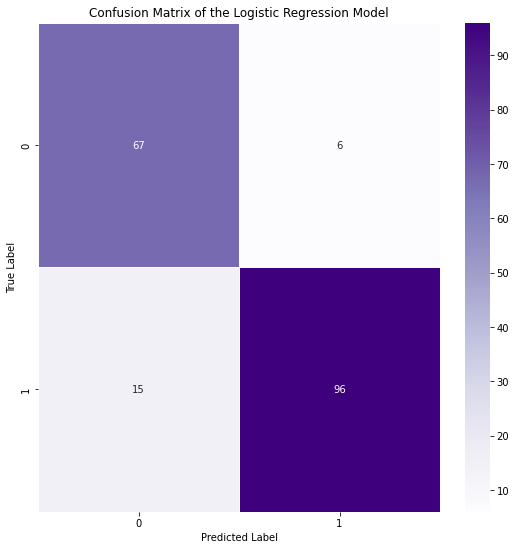

In [18]:
lg_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(lg_cm, linewidth = 1, cmap='Purples', fmt='.0f', annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of the Logistic Regression Model')
plt.show()

# K-nearest Neighbours Algorithm

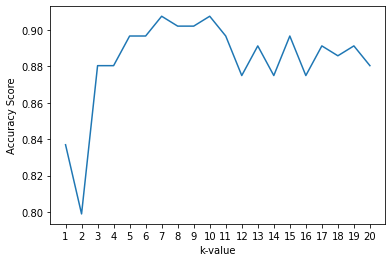

Accuracy of (best) KNN algorithm is 90.76 %


In [19]:
from sklearn.neighbors import KNeighborsClassifier

accuracies = {}
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

# we will attempt to find the best k-value
scores = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)  
    knn.fit(x_train.T, y_train.T)
    scores.append(knn.score(x_test.T, y_test.T))
    
plt.plot(range(1,21), scores)
plt.xticks(np.arange(1,21,1))
plt.xlabel("k-value")
plt.ylabel("Accuracy Score")
plt.show()

accuracy = max(scores) * 100
accuracies['KNN'] = accuracy
print("Accuracy of (best) KNN algorithm is {:.2f} %".format(accuracy))

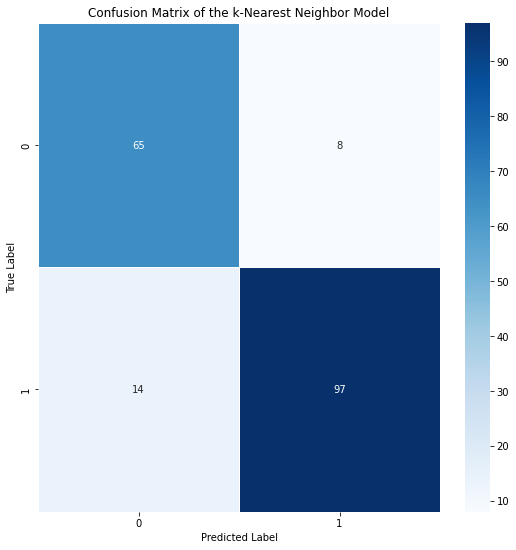

In [20]:
y_knn = knn.predict(x_test.T)
knn_cm = confusion_matrix(y_test,y_knn)

plt.figure(figsize=(9,9))
sns.heatmap(knn_cm, linewidth = 1, cmap='Blues', fmt='.0f', annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of the k-Nearest Neighbor Model')
plt.show()

# Naive Bayes Algorithm

In [21]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB(priors=None, var_smoothing=1e-09)
nb.fit(x_train.T, y_train.T)
accuracy = nb.score(x_test.T,y_test.T) * 100
accuracies['Naive Bayes'] = accuracy
print("Accuracy of Naive Bayes: {:.2f} %".format(accuracy))

Accuracy of Naive Bayes: 90.22 %


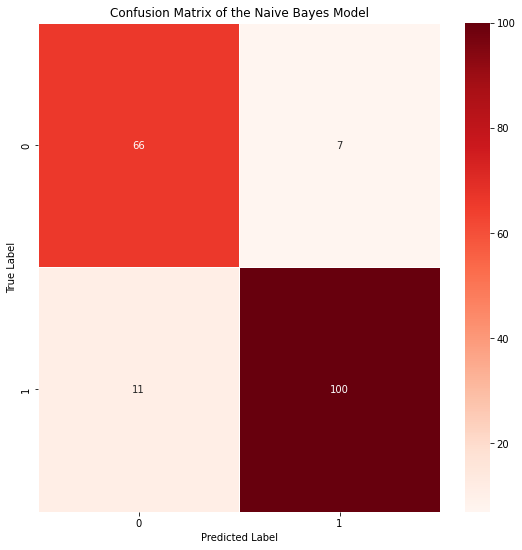

In [22]:
y_nb = nb.predict(x_test.T)
nb_cm = confusion_matrix(y_test,y_nb)

plt.figure(figsize=(9,9))
sns.heatmap(nb_cm, linewidth = 1, cmap='Reds', fmt='.0f', annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of the Naive Bayes Model')
plt.show()

# Decision Tree Algorithm

In [23]:
from sklearn.tree import DecisionTreeClassifier

# There are two main criteria for DecisionTreeClassifier, those are entropy and gini
# We will see which criterion will have higher accuracy 
dt_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3, splitter='best', min_samples_split=3, min_samples_leaf=2)
dt_entropy.fit(x_train.T, y_train.T)
entropy_accuracy = dt_entropy.score(x_test.T, y_test.T) * 100

dt_gini = DecisionTreeClassifier(criterion="gini", max_depth=3, splitter='best', min_samples_split=3, min_samples_leaf=2)
dt_gini.fit(x_train.T, y_train.T)
gini_accuracy = dt_gini.score(x_test.T, y_test.T) * 100

accuracy = max(entropy_accuracy, gini_accuracy)
accuracies['Decision Tree'] = accuracy
print("Accuracy of Decision Tree Algorithm {:.2f} %".format(accuracy))

Accuracy of Decision Tree Algorithm 85.87 %


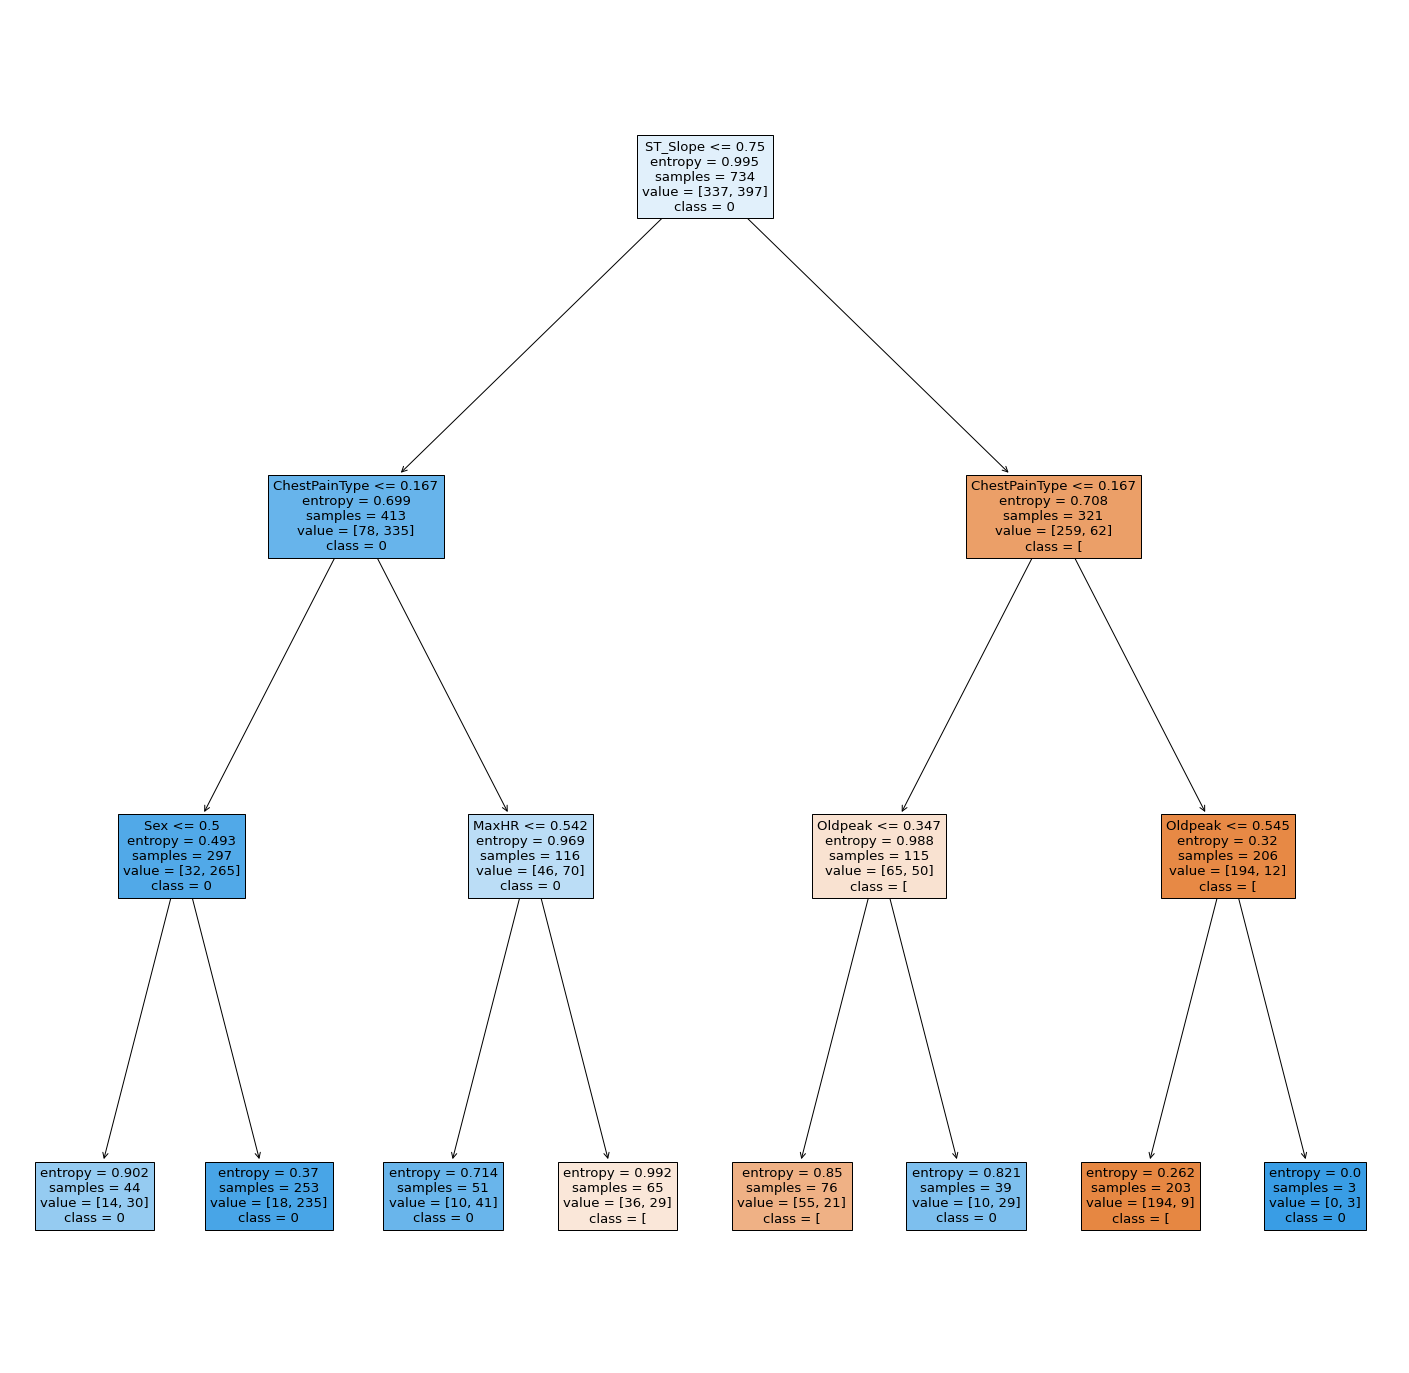

In [24]:
# Decision Tree Visualization 
from sklearn import tree
featureNames = df.columns.tolist()
classNames = str(df['HeartDisease'].tolist())
fig = plt.figure(figsize=(25, 25))
_ = tree.plot_tree(dt_entropy, 
                   feature_names=featureNames,  
                   class_names=classNames,
                   filled=True)

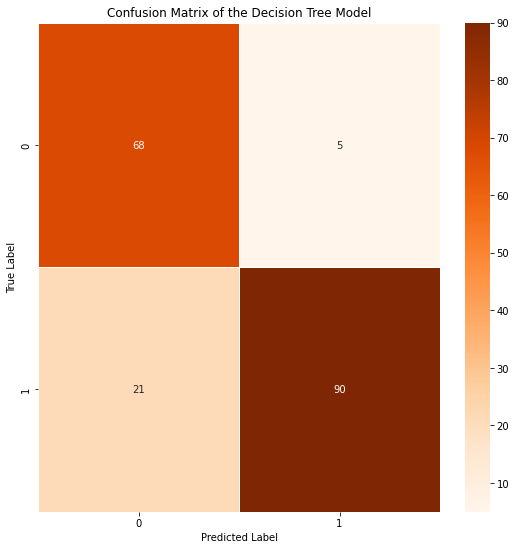

In [25]:
y_dt = dt_entropy.predict(x_test.T)
dt_cm = confusion_matrix(y_test,y_dt)

plt.figure(figsize=(9,9))
sns.heatmap(dt_cm, linewidth = 1, cmap='Oranges', fmt='.0f', annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of the Decision Tree Model')
plt.show()

# Support Vector Machine Algorithm

In [26]:
from sklearn.svm import SVC

svm = SVC(random_state = 1, degree = 4, verbose = True, shrinking = False)
svm.fit(x_train.T, y_train.T)
accuracy = svm.score(x_test.T,y_test.T) * 100
accuracies['SVM'] = accuracy
print("Accuracy of SVM Algorithm: {:.2f} %".format(accuracy))

[LibSVM]*
optimization finished, #iter = 429
obj = -243.702957, rho = 0.316870
nSV = 307, nBSV = 251
Total nSV = 307
Accuracy of SVM Algorithm: 91.30 %


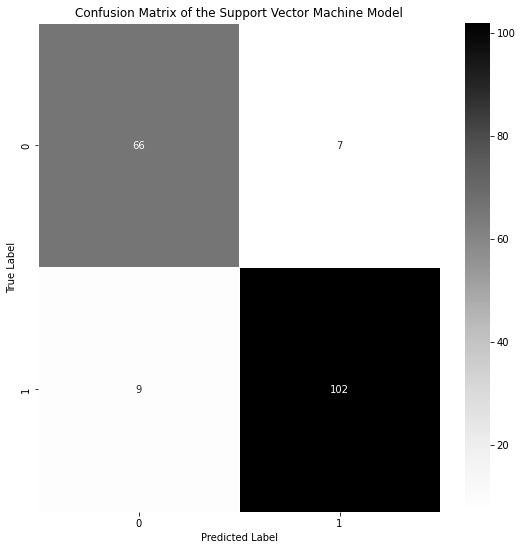

In [27]:
y_svm = svm.predict(x_test.T)
svm_cm = confusion_matrix(y_test,y_svm)

plt.figure(figsize=(9,9))
sns.heatmap(svm_cm, linewidth = 1, cmap='Greys', fmt='.0f', annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of the Support Vector Machine Model')
plt.show()

# Random Forest Algorithm

In [28]:
from sklearn.ensemble import RandomForestClassifier
# There are two main criteria for RandomForestClassifier, those are entropy and gini
# We will see which criterion will have higher accuracy 

rf_gini = RandomForestClassifier(n_estimators = 1000, criterion='gini', min_samples_split=4, min_samples_leaf=3, random_state = 1)
rf_gini.fit(x_train.T, y_train.T)
accuracy_gini = rf_gini.score(x_test.T,y_test.T) * 100

rf_entropy = RandomForestClassifier(n_estimators = 1000, criterion='entropy', min_samples_split=4, min_samples_leaf=3, random_state = 1)
rf_entropy.fit(x_train.T, y_train.T)
accuracy_entropy = rf_entropy.score(x_test.T,y_test.T) * 100

accuracy = max(accuracy_gini, accuracy_entropy)
accuracies['Random Forest'] = accuracy
print("Accuracy of Random Forest Algorithm: {:.2f} %".format(accuracy))

Accuracy of Random Forest Algorithm: 91.30 %


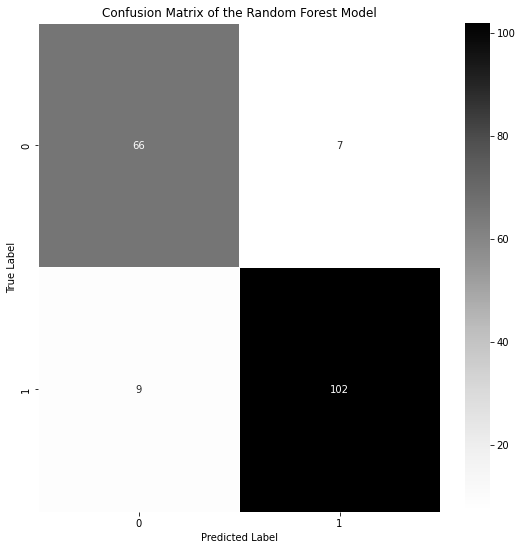

In [29]:
y_rf = svm.predict(x_test.T)
rf_cm = confusion_matrix(y_test,y_svm)

plt.figure(figsize=(9,9))
sns.heatmap(rf_cm, linewidth = 1, cmap='Greys', fmt='.0f', annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of the Random Forest Model')
plt.show()

# Gradient Boosting Algorithm

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)
gb.fit(x_train.T, y_train.T)
y_pred_GB = gb.predict(x_test.T)
GBA = accuracy_score(y_pred_GB, y_test.T)
print('Accuracy of Gradient Boosting: {:.2f} %'.format(GBA*100))

Accuracy of Gradient Boosting: 91.85 %


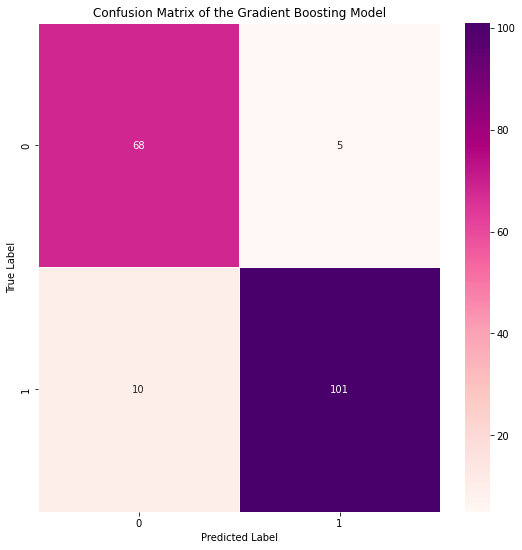

In [31]:
y_gb = gb.predict(x_test.T)
gb_cm = confusion_matrix(y_test,y_gb)

plt.figure(figsize=(9,9))
sns.heatmap(gb_cm, linewidth = 1, cmap='RdPu', fmt='.0f', annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of the Gradient Boosting Model')
plt.show()

In [32]:
# Creating an accuracy table
comparison_table = pd.DataFrame({'Algorithm': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting'
                                  ], 
                        'Accuracy': [LR*100, accuracies['KNN'], accuracies['SVM'], accuracies['Naive Bayes'], accuracies['Decision Tree'], accuracies['Random Forest'], GBA*100, 
                                     ]})

comparison_table.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='winter').hide_index().set_properties(**{'font-family': 'Times New Roman'})

Algorithm,Accuracy
Gradient Boosting,91.847826
Support Vector Machine,91.304348
Random Forest,91.304348
K-Nearest Neighbour,90.760870
Gaussian Naive Bayes,90.217391
Logistic Regression,88.586957
Decision Tree,85.869565
